In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor



### Exploratory Data Analysis (EDA)

In [71]:
data = pd.read_csv('./data/housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [72]:
data.columns.values

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'], dtype=object)

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Checking for missing values

In [74]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [75]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# We can see that the maximum bedrooms within a block are 6445 while mean bedrooms are 537. So it seems like the data is skewed, we will check that with a histogram

<Axes: xlabel='total_bedrooms', ylabel='Count'>

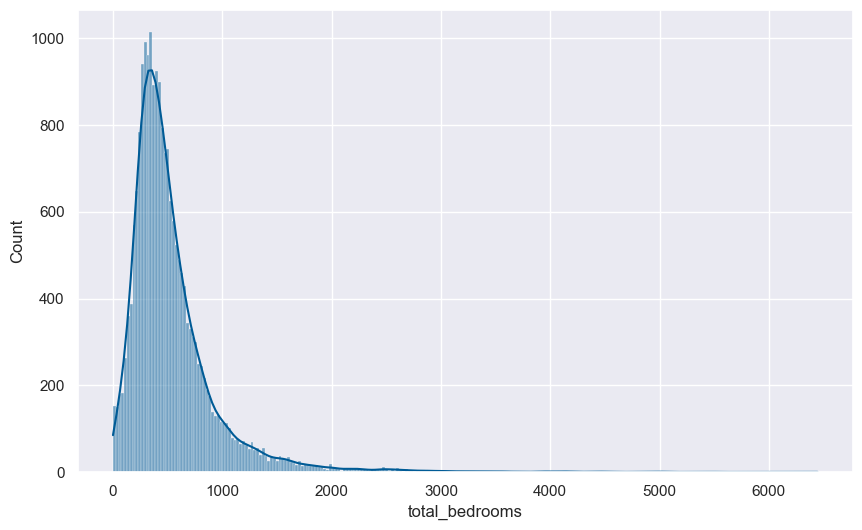

In [76]:
plt.figure(figsize=(10, 6))
sns.histplot(data['total_bedrooms'], color='#005b96', kde=True)

# fill missing values with median number of rooms within a block

In [77]:
data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)

C:\Users\NMH\AppData\Local\Temp\ipykernel_12660\1676755818.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)


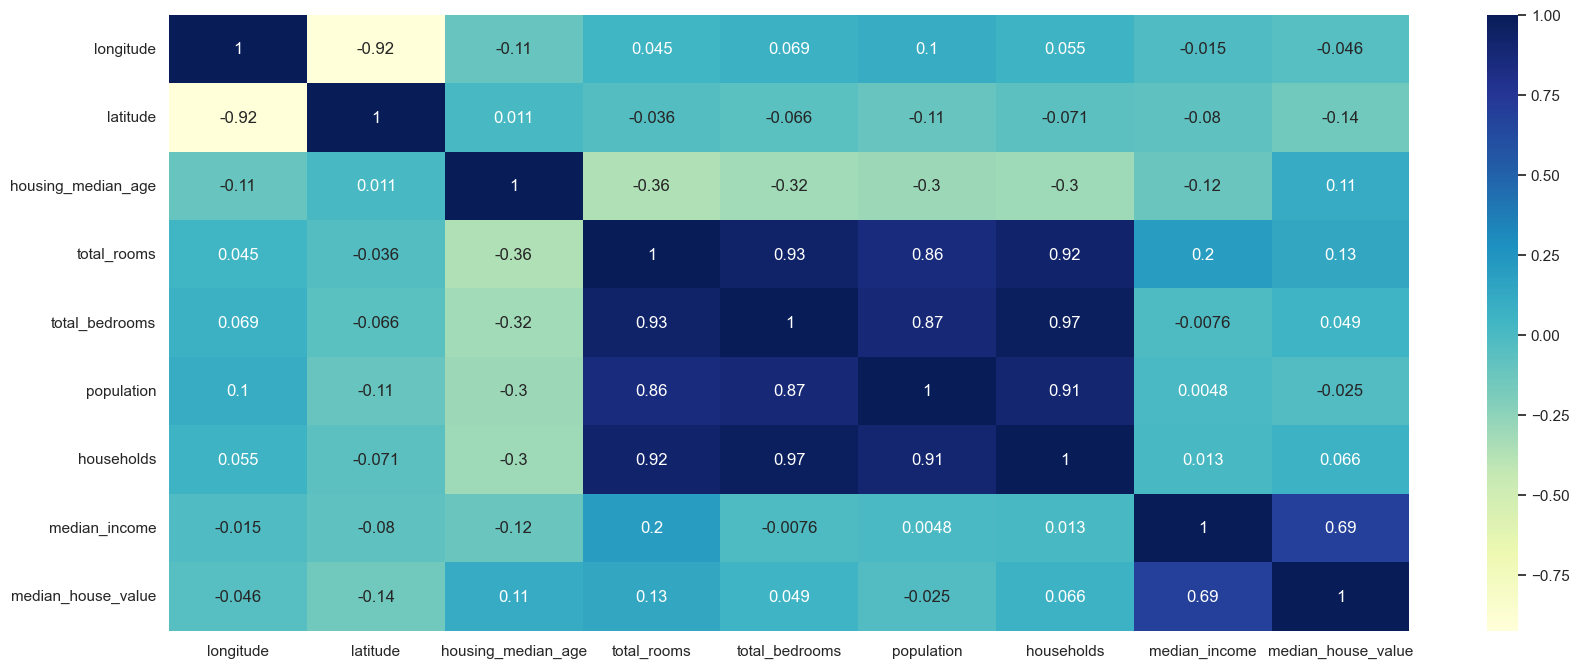

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your dataframe
# Remove non-numeric columns
data_numeric = data.select_dtypes(include=['number'])

# Now create the heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(data_numeric.corr(), annot=True, cmap='YlGnBu')
plt.show()


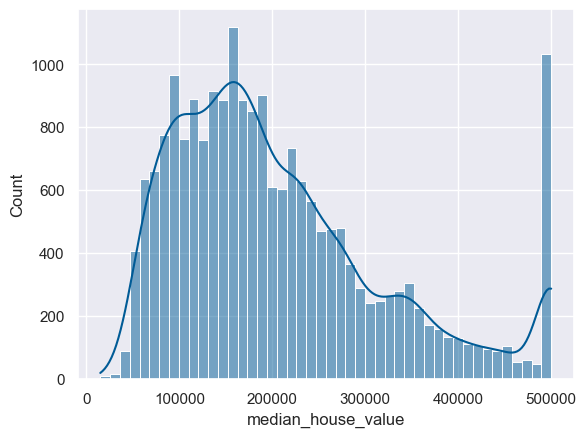

In [79]:
sns.histplot(data['median_house_value'], color='#005b96', kde= True);

In [80]:
  data['median_house_value'].skew()

np.float64(0.9777632739098341)

# Our target variable is clearly skewed. Therefore we will apply log transformation to it later

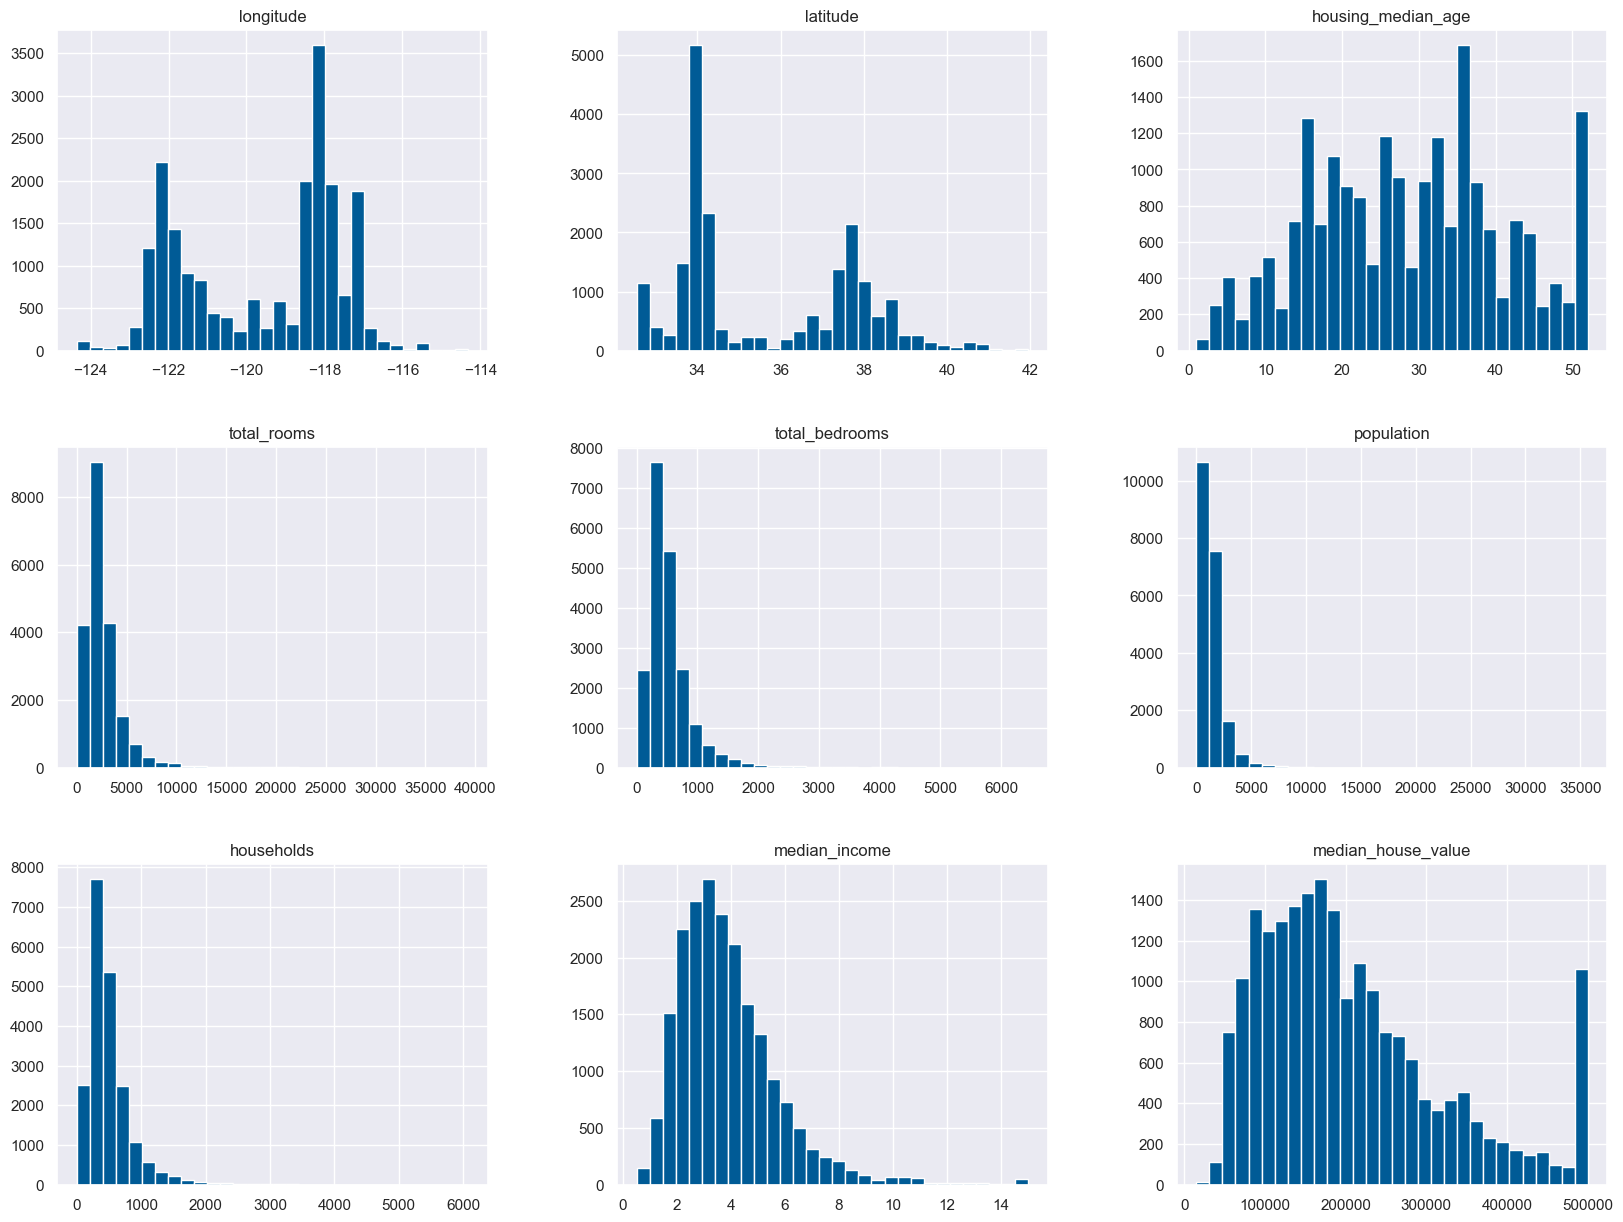

In [81]:
data.hist(bins=30, figsize=(20, 15), color='#005b96');

c:\Users\NMH\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1615: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=x, y=y, **kwargs)
c:\Users\NMH\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1615: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=x, y=y, **kwargs)
c:\Users\NMH\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1615: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=x, y=y, **kwargs)
c:\Users\NMH\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1615: FutureWarning: 

`shade` is now deprecated in favor of `fill`; 

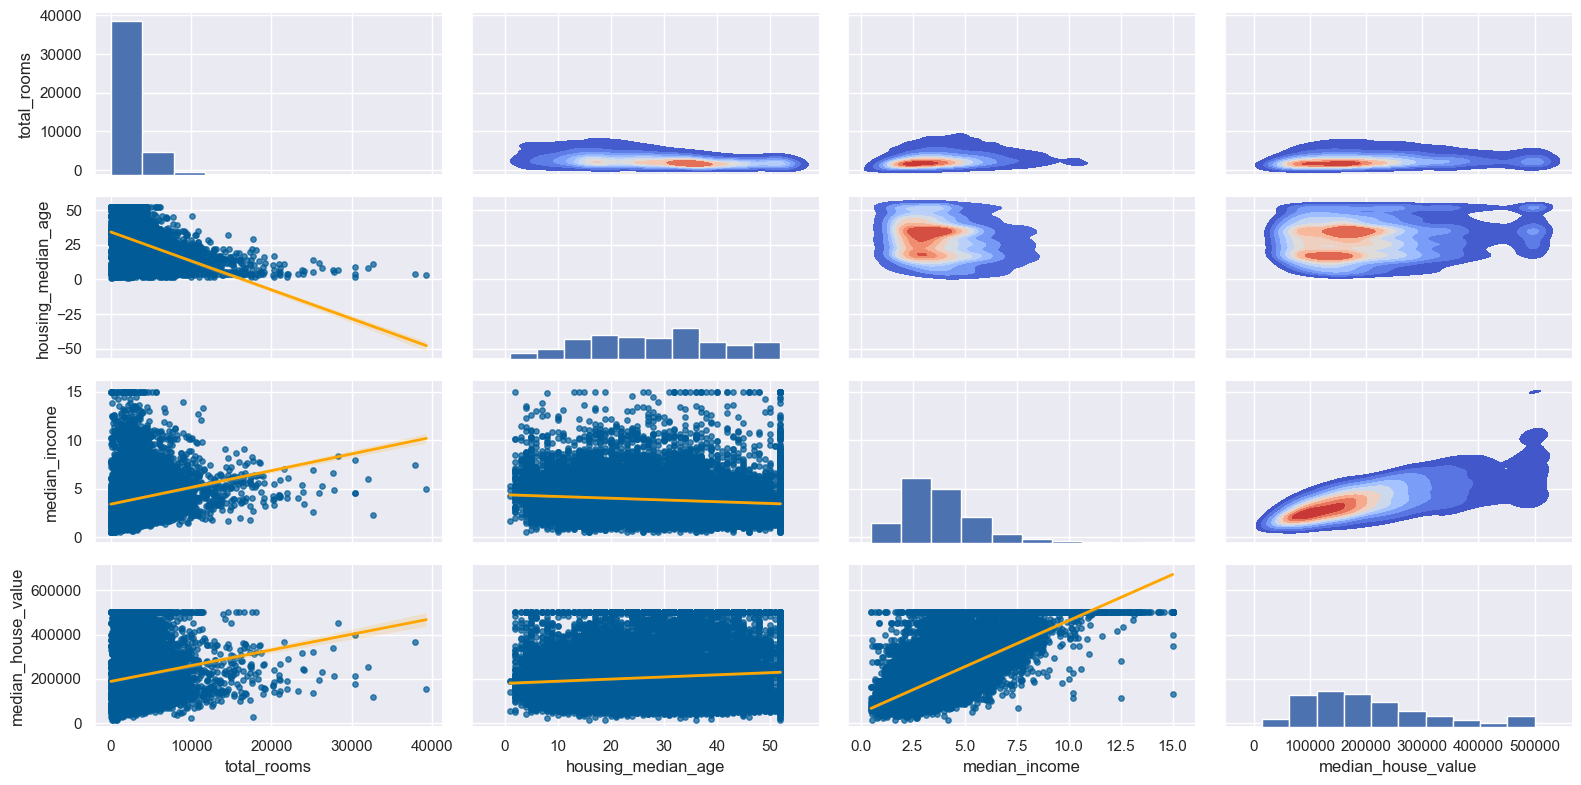

In [82]:
grid = sns.PairGrid(data, vars=['total_rooms', 'housing_median_age', 'median_income', 'median_house_value'],
                    height=2, aspect = 2)

grid = grid.map_diag(plt.hist)
grid = grid.map_lower(sns.regplot, scatter_kws = {'s': 15, 'alpha': 0.7, 'color': '#005b96'}, 
                      line_kws = {'color':'orange', 'linewidth': 2})
grid = grid.map_upper(sns.kdeplot, n_levels = 10, cmap= 'coolwarm', shade = True)

plt.show()

C:\Users\NMH\AppData\Local\Temp\ipykernel_12660\1294171392.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = data['ocean_proximity'], palette= 'RdPu');


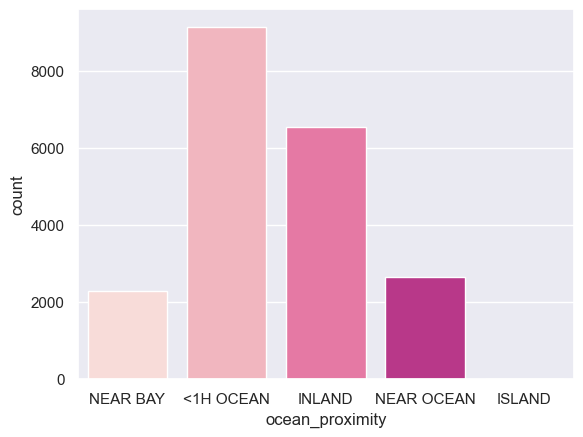

In [83]:
sns.countplot(x = data['ocean_proximity'], palette= 'RdPu');

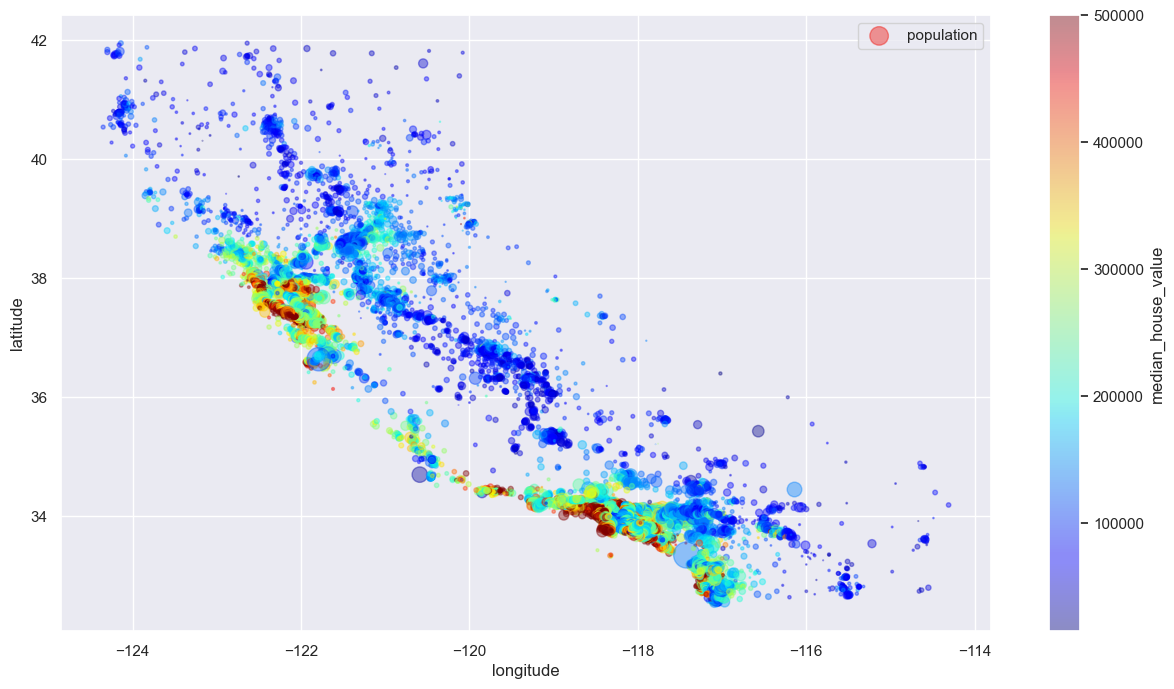

In [84]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
          s=data["population"]/100, label="population", figsize=(15,8),
          c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
          )

plt.legend()
plt.show()

### Feature Engineering

In [85]:
data['bed_per_room'] = data['total_bedrooms'] / data['total_rooms']

In [86]:
x = data.drop(['median_house_value'], axis=1)
y = np.log(data.median_house_value) # Applying log transformation

### Feature Transformations

In [87]:
skew_df = pd.DataFrame(x.select_dtypes(np.number).columns, columns= ['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: skew(x[feature]))
skew_df['Abs_Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Abs_Skew'].apply(lambda x: True if x > 0.5 else False)
skew_df

,Feature,Skew,Abs_Skew,Skewed
0,longitude,-0.297780,0.297780,False
1,latitude,0.465919,0.465919,False
2,housing_median_age,0.060326,0.060326,False
3,total_rooms,4.147042,4.147042,True
4,total_bedrooms,3.480888,3.480888,True
5,population,4.935500,4.935500,True
6,households,3.410190,3.410190,True
7,median_income,1.646537,1.646537,True
8,bed_per_room,6.316445,6.316445,True


In [88]:
skewed_columns = skew_df[skew_df['Abs_Skew'] > 0.5]['Feature'].values
skewed_columns

array(['total_rooms', 'total_bedrooms', 'population', 'households',
       'median_income', 'bed_per_room'], dtype=object)

In [89]:
for column in skewed_columns:
    x[column] = np.log(x[column])

### Encoding

In [90]:
encoder=LabelEncoder()
x['ocean_proximity']=encoder.fit_transform(x['ocean_proximity'])

### Scaling 

In [91]:
  x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,bed_per_room
0,-122.23,37.88,41.0,6.779922,4.859812,5.774552,4.836282,2.119287,3,-1.920110
1,-122.22,37.86,21.0,8.867709,7.008505,7.783641,7.037028,2.116424,3,-1.859204
2,-122.24,37.85,52.0,7.290975,5.247024,6.206576,5.176150,1.982022,3,-2.043951
3,-122.25,37.85,52.0,7.149917,5.459586,6.324359,5.389072,1.730434,3,-1.690331
4,-122.25,37.85,52.0,7.394493,5.634790,6.336826,5.556828,1.347086,3,-1.759704


In [92]:
scaler = StandardScaler()
scaler.fit(x)
x = pd.DataFrame(scaler.transform(x), index=x.index, columns=x.columns)

### Splitting Data

In [93]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

### Linear Regression

In [94]:
lr = LinearRegression()
lr.fit(x_train, y_train)
predictions_lr = lr.predict(x_test)

In [95]:
rmse = np.sqrt(mean_squared_error(y_test, predictions_lr))
r2 = r2_score(y_test, predictions_lr)

print('RMSE', rmse)
print('R-square', r2)

RMSE 0.34440381576518747
R-square 0.6345457124333704


### KNN

In [96]:
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
predictions_knn = knn.predict(x_test)

In [97]:
rmse = np.sqrt(mean_squared_error(y_test, predictions_knn))
r2 = r2_score(y_test, predictions_knn)

print('RMSE', rmse)
print('R-square', r2)

RMSE 0.29601285396707333
R-square 0.7300282680211424


### Random Forest

In [98]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)
predictions_rf = rf.predict(x_test)

In [99]:
rmse = np.sqrt(mean_squared_error(y_test, predictions_rf))
r2  = r2_score(y_test, predictions_rf)

print('RMSE', rmse)
print('R-square', r2)

RMSE 0.23424385730455585
R-square 0.8309428378746032


### XGBoost

In [111]:
xgboost = XGBRegressor()
xgboost.fit(x_train, y_train)
predictions_xgb = xgboost.predict(x_test)

In [110]:
rmde = np.sqrt(mean_squared_error(y_test, predictions_xgb))
r2 = r2_score(y_test, predictions_xgb)

print('RMSE', rmse)
print('R-square', r2)

RMSE 0.23424385730455585
R-square 0.833949552238219


### LightGBM

In [102]:
lgb = LGBMRegressor()
lgb.fit(x_train, y_train)
predictions_lgb = lgb.predict(x_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000268 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2099
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 10
[LightGBM] [Info] Start training from score 12.086494


In [103]:
lgb = np.sqrt(mean_squared_error(y_test, predictions_lgb))
r2 = r2_score(y_test, predictions_lgb)

print('RMSE', rmse)
print('R-square', r2)

RMSE 0.23424385730455585
R-square 0.8349986219828225


### Gradient Boosting

In [104]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
predictions_gbr = gbr.predict(x_test)

In [105]:
gbr = np.sqrt(mean_squared_error(y_test, predictions_gbr))
r2 = r2_score(y_test, predictions_gbr)

print('RMSE', rmse)
print('R-square', r2)

RMSE 0.23424385730455585
R-square 0.7780570347973894


In [112]:

final_predictions = (
  
    0.25 * predictions_rf+
    0.25 * predictions_xgb+
    0.25 * predictions_lgb
)

In [113]:
rmse  = np.sqrt(mean_squared_error(y_test, final_predictions))
r2 = r2_score(y_test, final_predictions)

print('RMSE', rmse)
print('R-square', r2)

RMSE 3.0286137845064327
R-square -27.260831899812597


In [114]:
final_predictions

array([8.15646904, 8.53188506, 9.7969034 , ..., 9.84145409, 8.41247628,
       9.02641924], shape=(4128,))

In [115]:
final_predictions = np.exp(final_predictions)
y_test = np.exp(y_test)

In [116]:
pd.DataFrame({'Actual': y_test, 'Predicted': final_predictions.round(2)})

,Actual,Predicted
20046,47700.0,3485.86
3024,45800.0,5074.00
15663,500001.0,17977.99
20484,218600.0,11255.94
9814,278000.0,11419.48
...,...,...
15362,263300.0,10665.68
16623,266800.0,10598.25
18086,500001.0,18797.03
2144,72300.0,4502.90


### Visualising the result

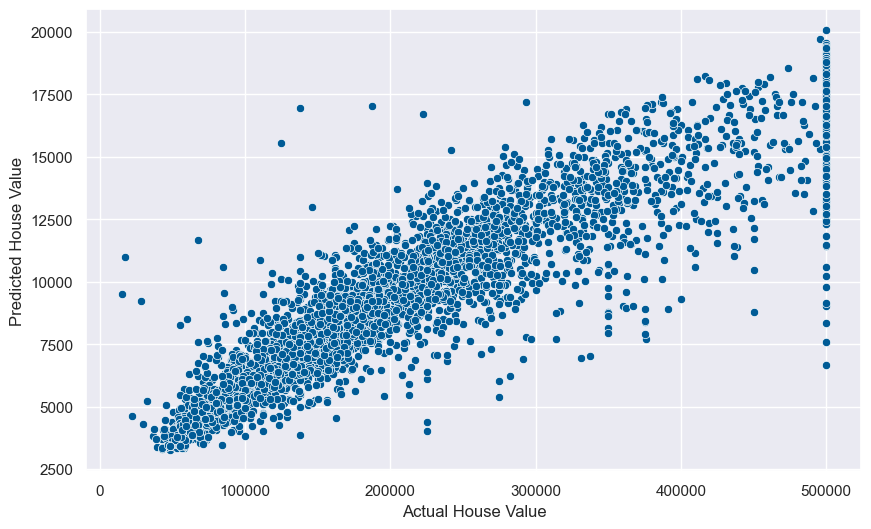

In [117]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=final_predictions, color='#005b96')
plt.xlabel('Actual House Value')
plt.ylabel('Predicted House Value')
plt.show()

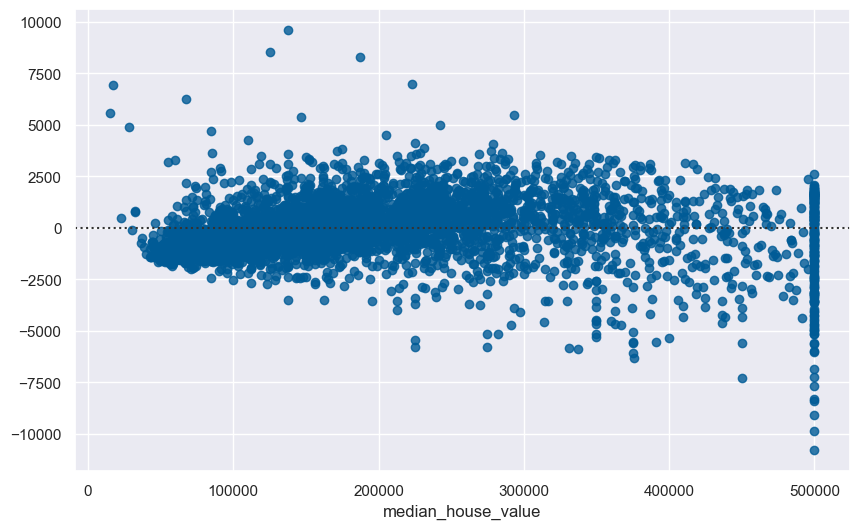

In [118]:
plt.figure(figsize=(10,6))
sns.residplot(x=y_test, y=final_predictions, color='#005b96')
plt.show()

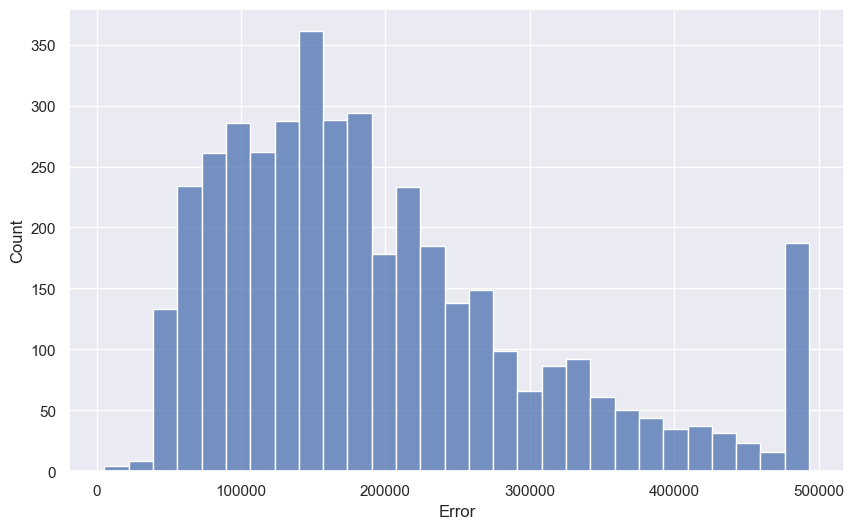

In [122]:
resid = y_test - final_predictions
plt.figure(figsize= (10, 6))
sns.histplot(resid)
plt.xlabel('Error');